In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [38]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [38]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [56]:
tf.reset_default_graph()

In [57]:
X = tf.placeholder(tf.float32, shape=[None,784])
X_img = tf.reshape(X,[-1,28,28,1])
Y = tf.placeholder(tf.float32, shape=[None,10])


In [58]:
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01))
L1 = tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding="SAME")
print(L1)
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1],padding="SAME")
print(L1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


In [59]:
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding="SAME")
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="SAME")
print(L2)
L2_flat = tf.reshape(L2,[-1,7*7*64])
print(L2_flat)
# 3136으로 바뀜

Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 3136), dtype=float32)


In [60]:
W3 = tf.get_variable("W3",shape=(7*7*64,10),initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2_flat,W3)+b

In [62]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis,labels=Y))

In [63]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


In [64]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [66]:
print("learning started it takes long time")
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost,optimizer],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c / total_batch
    print("Epoch :", epoch+1, "cost:",avg_cost)
print("learning finished")

learning started it takes long time
Epoch : 1 cost: 0.010355858942672382
Epoch : 2 cost: 0.009935193684637356
Epoch : 3 cost: 0.008131495809085945
Epoch : 4 cost: 0.007839357650736928
Epoch : 5 cost: 0.0069288909341544734
Epoch : 6 cost: 0.006106004814059405
Epoch : 7 cost: 0.005730044383151174
Epoch : 8 cost: 0.005928808218532969
Epoch : 9 cost: 0.0038099550805207587
Epoch : 10 cost: 0.00415690264330475
Epoch : 11 cost: 0.005302713200635477
Epoch : 12 cost: 0.004681213109107705
Epoch : 13 cost: 0.0027783575472684874
Epoch : 14 cost: 0.0030504111897549945
Epoch : 15 cost: 0.0037657902911159493
learning finished


In [68]:
prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

In [70]:
print("Accuracy :", sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels}))

Accuracy : 0.9885


Label :  [7]
prediction :  [7]


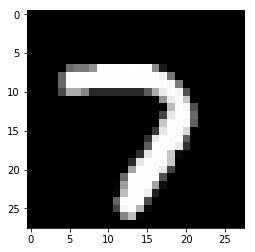

In [109]:
import random
r = random.randint(0,mnist.test.num_examples - 1)
print("Label : ", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("prediction : ",sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]}))
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap="gray", interpolation='nearest')